<a href="https://colab.research.google.com/github/Poornima1304/Fault_detection_exolegs/blob/main/Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib


In [ ]:
from google.colab import files
uploaded = files.upload() # importing directly from computer

Saving trainTS_1.csv to trainTS_1.csv
Saving trainTS_2.csv to trainTS_2.csv
Saving trainTS_3.csv to trainTS_3.csv


In [ ]:
df_all = pd.DataFrame() 
for file in uploaded:
    df_c = pd.read_csv(file) #add another parameters if it requires
    df_all = pd.concat([df_all, df_c]) #joining all the files

In [ ]:
df_all.to_csv('df_all.csv')

In [ ]:
df_all = df_all.astype('float32') #Important to convert the data
df_all

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10
0,0.040805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040805
1,0.072320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.072320
2,0.092521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.092521
3,0.115870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.115870
4,0.149000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.149000
...,...,...,...,...,...,...,...,...,...,...,...
13995,-0.166480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.166480
13996,-0.154540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.154540
13997,-0.147310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.147310
13998,-0.137590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.137590


In [ ]:
xDataFrame = df_all[df_all.columns[0]] #Slicing the data
yDataFrame = df_all[df_all.columns[5:9]]
zDataFrame = df_all[df_all.columns[9]]
zDataFrame = zDataFrame.tail(-9).to_numpy()
yDataFrame = yDataFrame.tail(-9)
print(zDataFrame)

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
X = xDataFrame.to_numpy()

Y = yDataFrame.to_numpy()

print(X)


[ 0.040805  0.07232   0.092521 ... -0.14731  -0.13759  -0.1261  ]


 # **Analysis starts here:** 

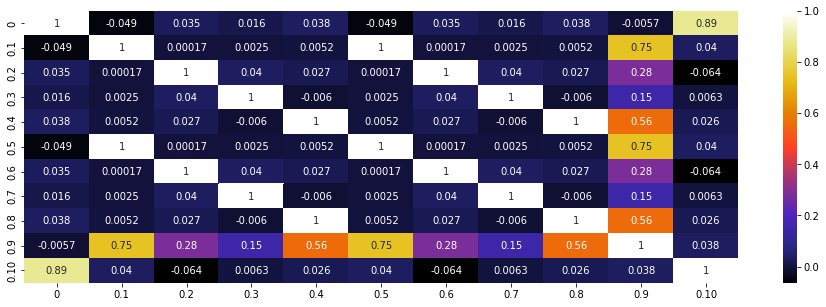

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

matrix=df_all.corr()
plt.figure(figsize = (16,5))
plt.savefig("heatmap.png")
dataplot=sns.heatmap(matrix,cmap='CMRmap',annot=True) # Correlation in the data

In [ ]:
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
 
values = [x for x in range(10)]
a_list = list(X)
data = series_to_supervised(a_list, 9)
print(data)
data = data.reset_index()
#result = pd.concat([data, yDataFrame], axis="columns" , ignore_index=True)

data.to_excel("out.xlsx")

       var1(t-9)  var1(t-8)  var1(t-7)  var1(t-6)  var1(t-5)  var1(t-4)  \
9       0.040805   0.072320   0.092521   0.115870    0.14900    0.19112   
10      0.072320   0.092521   0.115870   0.149000    0.19112    0.25568   
11      0.092521   0.115870   0.149000   0.191120    0.25568    0.33073   
12      0.115870   0.149000   0.191120   0.255680    0.33073    0.41387   
13      0.149000   0.191120   0.255680   0.330730    0.41387    0.50732   
...          ...        ...        ...        ...        ...        ...   
41995   0.057259   0.043002   0.025768  -0.035924   -0.17295   -0.26961   
41996   0.043002   0.025768  -0.035924  -0.172950   -0.26961   -0.25282   
41997   0.025768  -0.035924  -0.172950  -0.269610   -0.25282   -0.21038   
41998  -0.035924  -0.172950  -0.269610  -0.252820   -0.21038   -0.18554   
41999  -0.172950  -0.269610  -0.252820  -0.210380   -0.18554   -0.16648   

       var1(t-3)  var1(t-2)  var1(t-1)  var1(t)  
9        0.25568    0.33073    0.41387  0.50732  

In [ ]:

x_frame = data[data.columns[1:]] 
y_frame = yDataFrame


x_frame = np.round(x_frame*1000, 4)
x_frame = x_frame.astype(np.int32)
#.to_numpy()
print(x_frame)
x_frame.to_excel("qout.xlsx")
#y_frame

       var1(t-9)  var1(t-8)  var1(t-7)  var1(t-6)  var1(t-5)  var1(t-4)  \
0             40         72         92        115        149        191   
1             72         92        115        149        191        255   
2             92        115        149        191        255        330   
3            115        149        191        255        330        413   
4            149        191        255        330        413        507   
...          ...        ...        ...        ...        ...        ...   
41986         57         43         25        -35       -172       -269   
41987         43         25        -35       -172       -269       -252   
41988         25        -35       -172       -269       -252       -210   
41989        -35       -172       -269       -252       -210       -185   
41990       -172       -269       -252       -210       -185       -166   

       var1(t-3)  var1(t-2)  var1(t-1)  var1(t)  
0            255        330        413      507  

# **KNN**

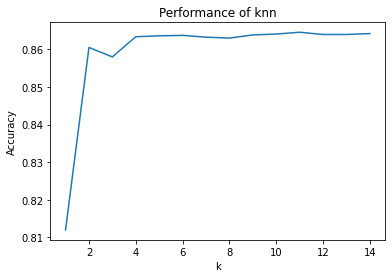

In [ ]:
#KNN tuning hyperparameter k
from re import I

# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(x_frame, zDataFrame, test_size = 0.2, shuffle = False)

accuracies = []
ks = range(1, 15)
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.savefig("knn_performance_over_k.png")
plt.show()

86.47954455183371
85.26914712979237
85.9394682191128
85.76875719903086
85.91582860683475
86.38069705093834
87.05218841846056
86.36959370904324


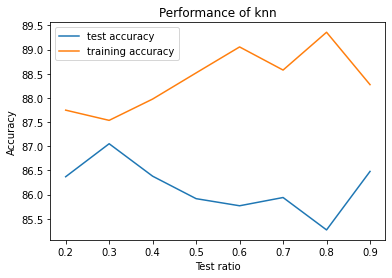

In [ ]:
#Determining Test-Train split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
import sklearn.metrics as metrics
from sklearn import tree
import matplotlib.pyplot as plt
test_ratio = [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2]
accuracies = []
overall_accuracy = []
training_accuracy = []
for i in range(0,8):
        X_train, X_test, y_train, y_test = train_test_split(x_frame, zDataFrame, test_size=test_ratio[i],shuffle = False)
        knn = KNeighborsClassifier(n_neighbors=6)
        knn.fit(X_train,y_train)
 

        y_predicted = knn.predict(X_test)
        y_predicted_training = knn.predict(X_train)#for training accuracy
        nacc          = metrics.accuracy_score(y_predicted          , y_test)
        nacc_training = metrics.accuracy_score(y_predicted_training , y_train)#for training accuracy
        overall_accuracy.append(nacc*100)
        training_accuracy.append(nacc_training*100)
        print(nacc*100)
fig, ax = plt.subplots()
ax.plot(test_ratio, overall_accuracy, label='test accuracy')
ax.plot(test_ratio, training_accuracy, label='training accuracy')
ax.set(xlabel="Test ratio",
       ylabel="Accuracy",
       title="Performance of knn")
ax.legend();
plt.savefig("knn_performance_over_testsize.png")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn import tree
import numpy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(x_frame, zDataFrame, test_size = 0.2, shuffle = False)

leaf_size = list(range(1,15))
n_neighbors = list(range(1,15))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [ ]:
# KNN training and saving model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn import tree
import numpy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(x_frame, zDataFrame, test_size = 0.2, shuffle = False)
 
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
file = open("sample2.txt", "w+")
knn = KNeighborsClassifier(leaf_size=1, n_neighbors=2, p=1)
#knn = KNeighborsClassifier(n_neighbors=4)
#Fitting the data to the classifier
knn.fit(X_train,y_train)
joblib.dump(knn, 'knn_scorer_new.pkl')
modelscorev2 = joblib.load('knn_scorer_new.pkl' , mmap_mode ='r')
result = modelscorev2.predict(X_test)
print(result)
cm = confusion_matrix(y_test, result)
print("f1_score: ", f1_score(y_test, result, average="macro"))
print("precision_score: ", precision_score(y_test, result, average="macro"))
print("recall_score: " , recall_score(y_test, result, average="macro"))    
print("Confusion matrix: ")
print(cm)
train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)
numpy.savetxt("ground_truth.txt", y_test)
numpy.savetxt("predicted.txt", result)
print("Training Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

[0. 0. 0. ... 0. 0. 0.]
f1_score:  0.5258139574140983
precision_score:  0.6575370179690279
recall_score:  0.4636579279233143
Confusion matrix: 
[[7178   47   13   27    0]
 [ 393    9    2    9    0]
 [ 158    1   74    6    1]
 [ 133    8    7  108    9]
 [  57    0   16   15  128]]
Training Accuracy:  0.9326030007144558
Test Accuracy:  0.8926062626503155


In [ ]:
test_accuracy_knn = test_accuracy
train_accuracy_knn = train_accuracy
print(test_accuracy)

train_accuracies = np.array([])
train_accuracies = np.append(train_accuracies, train_accuracy_knn)
test_accuracies = np.array([])
test_accuracies = np.append(test_accuracies, test_accuracy_knn)
print(train_accuracies)

0.8845100607215145
[0.92462491]


In [ ]:
#data visualization and ROC representation 
# links and references: https://github.com/vinyluis/Articles/tree/main/ROC%20Curve%20and%20ROC%20AUC
# links and references: https://towardsdatascience.com/multiclass-classification-evaluation-with-roc-curves-and-roc-auc-294fd4617e3a
# links and references: https://towardsdatascience.com/interpreting-roc-curve-and-roc-auc-for-classification-evaluation-28ec3983f077
from re import I
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
# Split into training and test set
# X_train, X_test, y_train, y_test = train_test_split(x_frame, zDataFrame, test_size = 0.3, shuffle = False)

X_train, X_test, y_train, Y_test = train_test_split(x_frame, zDataFrame, test_size = 0.2, shuffle = False)


model = KNeighborsClassifier(n_neighbors=6)
#Fitting the data to the classifier
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
# Predict the classes on the test data, and return the probabilities for each class
y_proba = model.predict_proba(X_test)


plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
classes = [0,1,2,4,6,10]
roc_auc_ovr = {}

def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a treshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list


for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    # Plots the probability distribution for the class and the rest
    #ax = plt.subplot(3, 4, i+1)
    #sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    #ax.set_title(c)
    #ax.legend([f"Class: {c}", "Rest"])
    #ax.set_xlabel(f"P(x = {c})")

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(3, 4, i+1)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
 
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
#plt.tight_layout()

plt.tight_layout()
plt.savefig('knn_class_ovr_roc_curve.png')


IndexError: ignored

<Figure size 864x576 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 6


# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = x_frame
y = zDataFrame

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()

ImportError: ignored

## XGBoost

88.34409398814564
88.48867323549548
89.31754779887052
88.97797181980552
89.40274337969137
89.986307078645
90.68106048579139
90.12977735444696


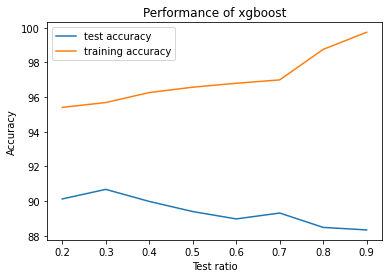

In [ ]:
# Import necessary modules
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn import tree
import numpy
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
test_ratio = [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2]
accuracies = []
overall_accuracy = []
training_accuracy = []
for i in range(0,8):
        X_train, X_test, y_train, y_test = train_test_split(x_frame, zDataFrame, test_size=test_ratio[i], shuffle = False)
        lc = LabelEncoder() 
        lc = lc.fit(zDataFrame) 
        lc_y = lc.transform(zDataFrame)
        model = xgb.XGBClassifier(colsample_bytree=0.7,learning_rate=0.01, max_depth=10 ,n_estimators=1000) 

        model.fit(X_train, y_train)
        y_predicted = model.predict(X_test)
        y_predicted_training = model.predict(X_train)#for training accuracy
        nacc          = metrics.accuracy_score(y_predicted          , y_test)
        nacc_training = metrics.accuracy_score(y_predicted_training , y_train)#for training accuracy
        overall_accuracy.append(nacc*100)
        training_accuracy.append(nacc_training*100)
        print(nacc*100)
fig, ax = plt.subplots()
ax.plot(test_ratio, overall_accuracy, label='test accuracy')
ax.plot(test_ratio, training_accuracy, label='training accuracy')
ax.set(xlabel="Test ratio",
       ylabel="Accuracy",
       title="Performance of xgboost")
ax.legend();
plt.savefig("xgb_performance_over_testsize.png")
plt.show()

In [ ]:
pip install xgboost==0.90

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 142.8 MB 46 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.6.2
    Uninstalling xgboost-1.6.2:
      Successfully uninstalled xgboost-1.6.2


In [ ]:

# Import necessary modules
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn import tree
import numpy
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from xgboost import XGBClassifier



# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(x_frame, zDataFrame, test_size = 0.3, shuffle = False)

model = xgb.XGBClassifier(colsample_bytree=0.7, learning_rate=0.01, max_depth=10 ,n_estimators=1000) 

model.fit(X_train, y_train)
model.save_model('xgb_scorer.bin')
#model2 = xgb.XGBRFClassifier()
#model2.load_model("xgb_scorer.bin")

#joblib.dump(model, 'xgb_scorer.pkl')
#modelscorev3 = joblib.load('xgb_scorer.pkl' , mmap_mode ='r')
#joblib.dump(model, 'scoreregression2.pkl')
#modelscorev2 = joblib.load('scoreregression2.pkl' , mmap_mode ='r')
result = model.predict(X_test)
train_accuracy_xgb = model.score(X_train, y_train)
test_accuracy_xgb = model.score(X_test, y_test)
#numpy.savetxt("ground_truth.txt", y_test)
#numpy.savetxt("predicted.txt", result)
print("Training Accuracy: ", train_accuracy_xgb)
print("Test Accuracy: ", test_accuracy_xgb)
cm = confusion_matrix(y_test, result)
print("f1_score: ", f1_score(y_test, result, average="macro"))
print("precision_score: ", precision_score(y_test, result, average="macro"))
print("recall_score: " , recall_score(y_test, result, average="macro"))    
print("Confusion Matrix: ")
print(cm)

Training Accuracy:  0.956860476984316
Test Accuracy:  0.906810604857914
f1_score:  0.5103003921473312
precision_score:  0.7459175109618638
recall_score:  0.47350467476357566
Confusion Matrix: 
[[10968     0    31     1     2]
 [  563     3     5     7     0]
 [  230     0    86     0     0]
 [  277     5     8    62    21]
 [   19     0     4     1   305]]


In [ ]:
train_accuracies = np.append(train_accuracies, train_accuracy_xgb)
test_accuracies = np.append(test_accuracies, test_accuracy_xgb)
print(train_accuracies)
print(test_accuracies)

[0.92462491 0.96509373]
[0.88451006 0.90022226]


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
import sklearn.metrics as metrics
from sklearn import tree
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(x_frame, zDataFrame, test_size = 0.3, shuffle = False)

#X_train,y_train = data[data.columns.tolist()[:-1]], data[data.columns.tolist()[-1]]

params = {'max_depth': [3,6,10], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 500, 1000], 'colsample_bytree': [0.3, 0.7]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, param_grid=params, scoring='neg_mean_squared_error', verbose=1)
clf.fit(X_train,y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['max_depth']
    stds_test = results['learning_rate']
    means_train = results['n_estimators']
    stds_train = results['colsample_bytree']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()
    plt.savefig('xg_boost_grid-search.png')

plot_search_results(clf)
#old : Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 1000}
#Lowest RMSE:  0.07242729814834885

#new: Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 1000}
#Lowest RMSE:  0.7479027193375274


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[16:00:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:00:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:00:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:00:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:00:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:00:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:00:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:01:03] WARNING: /workspace/src/objective/regr

KeyError: ignored

## SVM

87.03164690939882
86.66686512070967
86.72177995509288
86.14010716411985
86.25452467136597
86.71191284157885
87.41070011112875
86.60554827955708


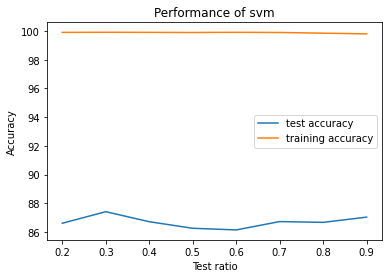

In [ ]:
from sklearn import svm
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn import tree
import numpy
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics


test_ratio = [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2]
accuracies = []
overall_accuracy = []
training_accuracy = []
for i in range(0,8):
        X_train, X_test, y_train, y_test = train_test_split(x_frame, zDataFrame, test_size=test_ratio[i], shuffle = False)
        clf = svm.SVC(C=1, gamma=1, kernel="rbf") 
        clf.fit(X_train, y_train) 
        y_predicted = clf.predict(X_test)
        y_predicted_training = clf.predict(X_train)#for training accuracy
        nacc          = metrics.accuracy_score(y_predicted          , y_test)
        nacc_training = metrics.accuracy_score(y_predicted_training , y_train)#for training accuracy
        overall_accuracy.append(nacc*100)
        training_accuracy.append(nacc_training*100)
        print(nacc*100)
fig, ax = plt.subplots()
ax.plot(test_ratio, overall_accuracy, label='test accuracy')
ax.plot(test_ratio, training_accuracy, label='training accuracy')
ax.set(xlabel="Test ratio",
       ylabel="Accuracy",
       title="Performance of svm")
ax.legend();
plt.savefig("svm_performance_over_testsize.png")
plt.show()

In [ ]:
from sklearn import svm
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn import tree
import numpy
from sklearn.metrics import mean_absolute_error




# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(x_frame, zDataFrame, test_size = 0.3, shuffle = False)

# Loop over K values
#file = open("sample2.txt", "w+")
clf = svm.SVC(C=1, gamma=0.0001, kernel="rbf") 
clf.fit(X_train, y_train) 

#SVC(C=100, gamma=1, kernel': 'rbf)

joblib.dump(clf, 'svm_scorer.pkl')
#modelscorev2 = joblib.load('scoreregression2.pkl' , mmap_mode ='r')
result = clf.predict(X_test)
train_accuracy_svm = clf.score(X_train, y_train)
test_accuracy_svm = clf.score(X_test, y_test)
#numpy.savetxt("ground_truth.txt", y_test)
#numpy.savetxt("predicted.txt", result)
print("Training Accuracy: ",train_accuracy_svm)
print("Test Accuracy: ",test_accuracy_svm)
cm = confusion_matrix(y_test, result)
print("f1_score: ", f1_score(y_test, result, average="macro"))
print("precision_score: ", precision_score(y_test, result, average="macro"))
print("recall_score: " , recall_score(y_test, result, average="macro"))
print("Confusion Matrix: ")    
print(cm)

Training Accuracy:  0.9259687680740313
Test Accuracy:  0.8852198761708208
f1_score:  0.3615111198144901
precision_score:  0.7572050593295175
recall_score:  0.30952360927286565
Confusion Matrix: 
[[10967     2    23     6     4]
 [  555     5    11     7     0]
 [  234     0    75     5     2]
 [  328     0     2    40     3]
 [  253     0    11     0    65]]


In [ ]:
train_accuracies = np.append(train_accuracies, train_accuracy_svm)
test_accuracies = np.append(test_accuracies, test_accuracy_svm)
print(train_accuracies)
print(test_accuracies)

[0.92462491 0.96509373 0.88830674]
[0.88451006 0.90022226 0.87783775]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import tree
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(x_frame, zDataFrame, test_size = 0.3, shuffle = False)

clf = svm.SVC() 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))



def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    #print(results)
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_score_time']
    stds_train = results['std_score_time']


    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    #plt.show()
    plt.savefig('svm_gridf-search.png')

plot_search_results(grid)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.869 total time= 4.2min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.869 total time= 4.1min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.869 total time= 4.1min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.869 total time= 4.1min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.869 total time= 4.1min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.869 total time= 4.1min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.869 total time= 4.1min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.869 total time= 4.1min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.869 total time= 4.1min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.869 total time= 4.1min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.869 total time= 3.9min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

## Gaussian

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt
import joblib
from sklearn import tree
import numpy
from sklearn.metrics import mean_absolute_error




# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(x_frame, zDataFrame, test_size = 0.3, shuffle = False)

# Loop over K values
#file = open("sample2.txt", "w+")
gnb = GaussianNB()
gnb.fit(X_train, y_train) 



joblib.dump(gnb, 'gaussian_scorer.pkl')
#modelscorev2 = joblib.load('scoreregression2.pkl' , mmap_mode ='r')
#result = modelscorev2.predict(X_test)
train_accuracy = gnb.score(X_train, y_train)
test_accuracy = gnb.score(X_test, y_test)
#numpy.savetxt("ground_truth.txt", y_test)
#numpy.savetxt("predicted.txt", result)
print(train_accuracy)
print(test_accuracy)

0.31191099921750076
0.31015321108200367


# Decision tree

85.89964252614854
87.66719294587269
87.82214959316379
87.544187154943
87.62213431199658
88.77569258266308
89.4272777821908
88.56189681877756


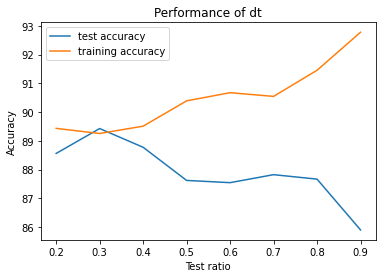

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn import tree
import numpy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics


test_ratio = [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2]
accuracies = []
overall_accuracy = []
training_accuracy = []
for i in range(0,8):
        X_train, X_test, y_train, y_test = train_test_split(x_frame, zDataFrame, test_size=test_ratio[i], shuffle = False) 
        clf = DecisionTreeClassifier(random_state=0, max_depth=6, criterion='gini')  
        clf.fit(X_train,y_train)
        y_predicted = clf.predict(X_test)
        y_predicted_training = clf.predict(X_train)#for training accuracy
        nacc = metrics.accuracy_score(y_predicted, y_test) 
        nacc_training = metrics.accuracy_score(y_predicted_training , y_train)#for training accuracy
        overall_accuracy.append(nacc*100)
        training_accuracy.append(nacc_training*100)
        print(nacc*100)
fig, ax = plt.subplots()
ax.plot(test_ratio, overall_accuracy, label='test accuracy')
ax.plot(test_ratio, training_accuracy, label='training accuracy')
ax.set(xlabel="Test ratio",
       ylabel="Accuracy",
       title="Performance of dt")
ax.legend();
plt.savefig("dt_performance_over_testsize.png")
plt.show()

In [ ]:
# Import necessary modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn import tree
import numpy
from sklearn.pipeline import Pipeline

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(x_frame, zDataFrame, test_size = 0.2, shuffle = False)
 
clf = DecisionTreeClassifier(random_state=0, max_depth=6, criterion='gini')  
#train_accuracy = np.empty(len(neighbors))
#test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
#file = open("sample2.txt", "w+")
#knn = KNeighborsClassifier(n_neighbors=2)
#Fitting the data to the classifier
clf.fit(X_train,y_train)
joblib.dump(clf, 'dt_scorer.pkl')
#modelscorev2 = joblib.load('scoreregression2.pkl' , mmap_mode ='r')
result = clf.predict(X_test)
train_accuracy_dt = clf.score(X_train, y_train)
test_accuracy_dt = clf.score(X_test, y_test)
#numpy.savetxt("ground_truth.txt", y_test)
#numpy.savetxt("predicted.txt", result)
print("Training Accuracy: ",train_accuracy_dt)
print("Test Accuracy: ",test_accuracy_dt)
cm = confusion_matrix(y_test, result)
print("f1_score: ", f1_score(y_test, result, average="macro"))
print("precision_score: ", precision_score(y_test, result, average="macro"))
print("recall_score: " , recall_score(y_test, result, average="macro"))   
print("Confusion Matrix: ") 
print(cm)

Training Accuracy:  0.8953917599428435
Test Accuracy:  0.887367543755209
f1_score:  0.4050736069552924
precision_score:  0.526454628082636
recall_score:  0.398722064953447
Confusion Matrix: 
[[7234    4    7   18    2]
 [ 412    0    0    1    0]
 [ 224    1    5   10    0]
 [ 245    0    0   16    4]
 [  18    0    0    0  198]]


In [ ]:
train_accuracies = np.append(train_accuracies, train_accuracy_svm)
test_accuracies = np.append(test_accuracies, test_accuracy_svm)
print(train_accuracies)
print(test_accuracies)

[0.92462491 0.96509373 0.88830674 0.88830674]
[0.88451006 0.90022226 0.87783775 0.87783775]


Plot accuracies

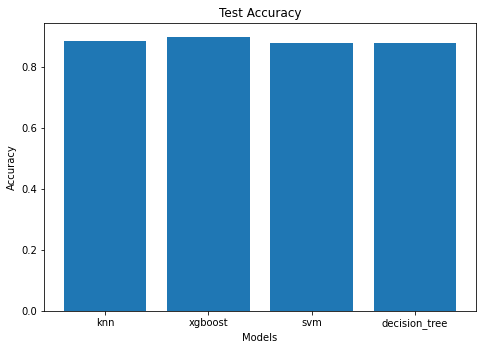

<Figure size 432x288 with 0 Axes>

In [ ]:
X_axis = np.array(['knn', 'xgboost', 'svm', 'decision_tree'])
y_axis_train = train_accuracies
y_axis_test = test_accuracies
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X_axis,y_axis_test)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Test Accuracy")
plt.show()
plt.savefig("test_accuracies_models.png")


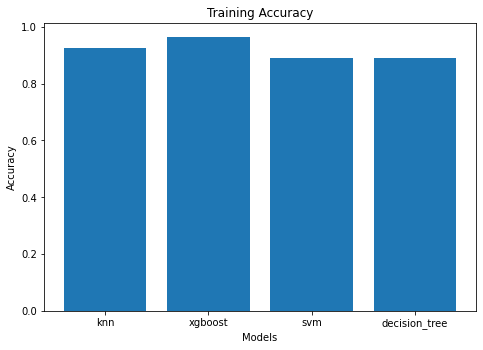

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X_axis,y_axis_train)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.show()
plt.savefig("train_accuracies_models.png")


In [ ]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(x_frame, zDataFrame, test_size = 0.2, shuffle = False)

std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('std_slc', std_slc), ('pca', pca), ('dec_tree', dec_tree)])
n_components = list(range(1,X_train.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(pca__n_components=n_components, dec_tree__criterion=criterion, dec_tree__max_depth=max_depth)
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, y_train)
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 2
Best Number Of Components: 1

DecisionTreeClassifier(max_depth=2)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn import tree
import numpy
from sklearn.metrics import mean_absolute_error




# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(x_frame, zDataFrame, test_size = 0.3, shuffle = False)

X_train, y_train = make_classification(n_samples=1000, n_classes=9, n_informative=5, random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)

# Loop over K values
#file = open("sample2.txt", "w+")
clf.fit(X_train, y_train) 



#joblib.dump(model, 'scoreregression2.pkl')
#modelscorev2 = joblib.load('scoreregression2.pkl' , mmap_mode ='r')
#result = modelscorev2.predict(X_test)
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
#numpy.savetxt("ground_truth.txt", y_test)
#numpy.savetxt("predicted.txt", result)
print(train_accuracy)
print(test_accuracy)